In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm  # tqdm是显示循环进度条的库

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm  # tqdm是显示循环进度条的库


class CliffWalkingEnv:
    def __init__(self, ncol, nrow):
        self.nrow = nrow
        self.ncol = ncol
        self.x = 0  # 记录当前智能体位置的横坐标
        self.y = self.nrow - 1  # 记录当前智能体位置的纵坐标

    def step(self, action):  # 外部调用这个函数来改变当前位置
        # 4种动作, change[0]:上, change[1]:下, change[2]:左, change[3]:右。坐标系原点(0,0)
        # 定义在左上角
        change = [[0, -1], [0, 1], [-1, 0], [1, 0]]
        self.x = min(self.ncol - 1, max(0, self.x + change[action][0]))
        self.y = min(self.nrow - 1, max(0, self.y + change[action][1]))
        next_state = self.y * self.ncol + self.x
        reward = -1
        done = False
        if self.y == self.nrow - 1 and self.x > 0:  # 下一个位置在悬崖或者目标
            done = True
            if self.x != self.ncol - 1:
                reward = -100
        return next_state, reward, done

    def reset(self):  # 回归初始状态,坐标轴原点在左上角
        self.x = 0
        self.y = self.nrow - 1
        return self.y * self.ncol + self.x

In [4]:
ncol = 12
nrow = 4
env = CliffWalkingEnv(ncol, nrow)
np.random.seed(0)
epsilon = 0.1
alpha = 0.1
gamma = 0.9
num_episodes = 500  # 智能体在环境中运行的序列的数量

In [15]:
def print_agent(agent, env, action_meaning, disaster=[], end=[]):
    for i in range(env.nrow):
        for j in range(env.ncol):
            if (i * env.ncol + j) in disaster:
                print('****', end=' ')
            elif (i * env.ncol + j) in end:
                print('EEEE', end=' ')
            else:
                a = agent.best_action(i * env.ncol + j)
                pi_str = ''
                for k in range(len(action_meaning)):
                    pi_str += action_meaning[k] if a[k] > 0 else 'o'
                print(pi_str, end=' ')
        print()

In [18]:
class QLearning:
    
    def __init__(self,ncol,nrow,epsilon,alpha,gamma,n_action=4):
        print(nrow*ncol,n_action)
        self.Q_table = np.zeros([nrow*ncol,n_action])
        self.n_action = n_action
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
    
    def take_action(self,state):
        if np.random.random() < self.epsilon:
            action = np.random.randint(self.n_action)
        else:
            action = np.argmax(self.Q_table[state])
        return action
    
    
    def best_action(self,state):
        Q_max = np.max(self.Q_table[state])
        a = [0 for _ in range(self.n_action)]
        for i in range(self.n_action):
            if self.Q_table[state,i] == Q_max:
                a[i] = 1
        return a
    
    def update(self,s0,a0,r,s1):
        td_error = r + self.gamma * self.Q_table[s1].max() - self.Q_table[s0,a0]
        self.Q_table[s0,a0] += self.alpha * td_error

In [19]:
np.random.seed(0)
epsilon = 0.1
alpha = 0.1
gamma = 0.9
agent = QLearning(ncol, nrow, epsilon, alpha, gamma)
num_episodes = 500  # 智能体在环境中运行的序列的数量

48 4


In [20]:
return_list = []

In [22]:
for i in range(10):
    
    with tqdm(total=int(num_episodes/10),desc='Iteration %d' % i) as pbar:
        for i_episode in range(int(num_episodes/10)):
            episode_return = 0
            state = env.reset()
            done = False
            while not done:
                action = agent.take_action(state)
                next_state,reward,done = env.step(action)
                episode_return += reward
                agent.update(state,action,reward,next_state)
                state = next_state
            return_list.append(episode_return)
            if (i_episode + 1) % 10 == 0:
                ans =           {
                    'episode':
                    '%d' % (num_episodes / 10 * i + i_episode + 1),
                    'return':
                    '%.3f' % np.mean(return_list[-10:])
                    }
                print(ans)
            pbar.update(1)

Iteration 0


{'episode': '10', 'return': '-33.800'}
{'episode': '20', 'return': '-23.200'}
{'episode': '30', 'return': '-59.900'}
{'episode': '40', 'return': '-24.100'}
{'episode': '50', 'return': '-52.400'}


Iteration 1


{'episode': '60', 'return': '-52.300'}
{'episode': '70', 'return': '-42.400'}
{'episode': '80', 'return': '-50.300'}
{'episode': '90', 'return': '-34.100'}
{'episode': '100', 'return': '-50.800'}


Iteration 2


{'episode': '110', 'return': '-23.300'}
{'episode': '120', 'return': '-54.000'}
{'episode': '130', 'return': '-32.600'}
{'episode': '140', 'return': '-35.100'}
{'episode': '150', 'return': '-44.100'}


Iteration 3


{'episode': '160', 'return': '-34.000'}
{'episode': '170', 'return': '-50.700'}
{'episode': '180', 'return': '-24.800'}
{'episode': '190', 'return': '-50.400'}
{'episode': '200', 'return': '-23.200'}


Iteration 4


{'episode': '210', 'return': '-33.900'}
{'episode': '220', 'return': '-62.800'}
{'episode': '230', 'return': '-41.700'}
{'episode': '240', 'return': '-15.600'}
{'episode': '250', 'return': '-23.400'}


Iteration 5


{'episode': '260', 'return': '-62.100'}
{'episode': '270', 'return': '-23.200'}
{'episode': '280', 'return': '-23.300'}
{'episode': '290', 'return': '-34.500'}
{'episode': '300', 'return': '-32.500'}


Iteration 6


{'episode': '310', 'return': '-34.300'}
{'episode': '320', 'return': '-52.400'}
{'episode': '330', 'return': '-23.900'}
{'episode': '340', 'return': '-41.700'}
{'episode': '350', 'return': '-23.300'}


Iteration 7


{'episode': '360', 'return': '-42.000'}
{'episode': '370', 'return': '-51.200'}
{'episode': '380', 'return': '-52.000'}
{'episode': '390', 'return': '-31.900'}
{'episode': '400', 'return': '-14.200'}


Iteration 8


{'episode': '410', 'return': '-33.300'}
{'episode': '420', 'return': '-15.500'}
{'episode': '430', 'return': '-49.600'}
{'episode': '440', 'return': '-41.600'}
{'episode': '450', 'return': '-31.400'}


Iteration 9

{'episode': '460', 'return': '-40.800'}
{'episode': '470', 'return': '-43.200'}
{'episode': '480', 'return': '-50.600'}
{'episode': '490', 'return': '-13.500'}
{'episode': '500', 'return': '-32.400'}


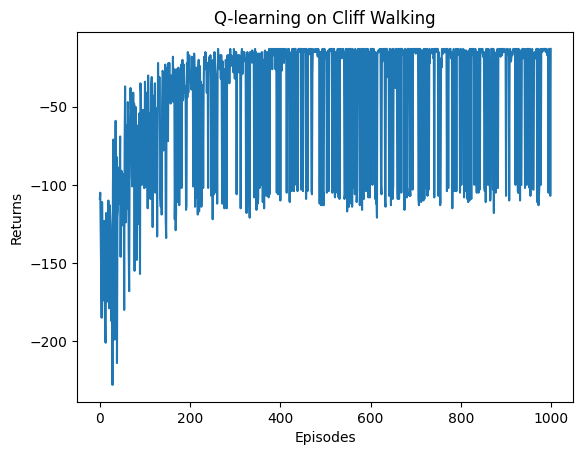

Q-learning算法最终收敛得到的策略为：
ovoo ^ooo ^ooo ooo> ooo> ooo> ovoo ooo> ooo> ooo> ooo> ovoo 
ooo> ooo> ovoo ovoo ooo> ovoo ooo> ooo> ovoo ooo> ooo> ovoo 
ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ovoo 
^ooo **** **** **** **** **** **** **** **** **** **** EEEE 


In [23]:
episodes_list = list(range(len(return_list)))
plt.plot(episodes_list, return_list)
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('Q-learning on {}'.format('Cliff Walking'))
plt.show()

action_meaning = ['^', 'v', '<', '>']
print('Q-learning算法最终收敛得到的策略为：')
print_agent(agent, env, action_meaning, list(range(37, 47)), [47])

In [6]:
import numpy as np
print(11)

class CliffWalking2x3Env:
    def __init__(self):
        self.shape = (2, 3)  # 2行3列
        self.start_state = 3  # 起点在第二行第一列（状态3）
        self.cliff_state = 1  # 悬崖在第一行第二列（状态1）
        self.goal_state = 5  # 终点在第二行第三列（状态5）
        self.current_state = self.start_state
        
        # 动作空间：0=上，1=右，2=下，3=左
        self.action_space = 4
        self.observation_space = 6  # 状态空间大小
        
    def reset(self):
        """重置环境到初始状态"""
        self.current_state = self.start_state
        return self.current_state
    
    def state_to_pos(self, state):
        """将状态编号转换为坐标"""
        row = state // 3
        col = state % 3
        return (row, col)
    
    def pos_to_state(self, row, col):
        """将坐标转换为状态编号"""
        return row * 3 + col
    
    def step(self, action):
        """执行动作并返回新状态、奖励、是否终止"""
        row, col = self.state_to_pos(self.current_state)
        new_row, new_col = row, col
        
        # 计算新坐标
        if action == 0:    # 上
            new_row = max(row - 1, 0)
        elif action == 1:  # 右
            new_col = min(col + 1, 2)
        elif action == 2:  # 下
            new_row = min(row + 1, 1)
        elif action == 3:  # 左
            new_col = max(col - 1, 0)
        
        # 检查是否越界（此逻辑已包含在max/min中，可省略）
        new_state = self.pos_to_state(new_row, new_col)
        reward = -1  # 默认每步-1奖励
        done = False
        
        # 判断是否掉下悬崖或到达终点
        if new_state == self.cliff_state:
            reward = -100
            self.current_state = self.start_state  # 回到起点
        elif new_state == self.goal_state:
            reward = 10
            done = True
            self.current_state = new_state
        else:
            self.current_state = new_state
        
        return self.current_state, reward, done,done, {}
    
    def render(self):
        """可视化当前状态"""
        grid = [
            ['S', 'C', 'S'],
            ['S', 'S', 'G']
        ]
        row, col = self.state_to_pos(self.current_state)
        grid[row][col] = 'A'  # 用A表示智能体位置
        print(f"+---+---+---+")
        print(f"|{grid[0][0]}|{grid[0][1]}|{grid[0][2]}|")
        print(f"+---+---+---+")
        print(f"|{grid[1][0]}|{grid[1][1]}|{grid[1][2]}|")
        print(f"+---+---+---+")
        print()


env = CliffWalking2x3Env()
state = env.reset()
done = False

print("初始状态：")
env.render()

# 示例动作序列：右→右→上→右→下→右
actions = [1, 1, 0, 1, 2, 1]

for action in actions:
    next_state, reward, done, _,_ = env.step(action)
    print(f"执行动作 {action} 后:")
    env.render()
    print(f"奖励: {reward}, 终止: {done}\n")
    if done:
        break